# Regression (Instructional Worksheet)

## Regression Line or Best Fit Line

We will run a linear model, or linear regression, to model the relationship between the dependent and independent variables of interest. Using the *iris* dataset from the last module, we are interested in whether or not we can use the petal length to estimate the petal width for an iris. 

We know that the equation for a line is:
$$Y = bX + a$$  

In our situation, Y is the petal width, or the independent variable, and X is petal length or the dependent variable. *b* is the slope of the line and *a* is the intercept.

In Python, we will create a linear model, and then look at the summary of the model output, which will give us the equation for the line. We can then plot the best fit line, or regression line on our scatterplot.

We will use the *lm()* function to create our linear model, and then the *summary()* function to look at the results. We will then use the *abline()* function to plot the best fit line.

In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [3]:
iris = pd.read_csv('../data/iris.csv')

In [20]:
y = iris['Petal.Width']
x = iris['Petal.Length']
x = sm.add_constant(x)
m = sm.OLS(y,x)
fit = m.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Petal.Width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           4.68e-86
Time:                        19:33:19   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

Looking at the results, we can see that the intercept, _a_, is $-0.363$, and the slope, *b*, is $0.416$. Therefore our equation is:
$$Y = 0.416X - 0.363$$

Now, let's create our scatterplot, and then add this line to our plot.

In [39]:
fit.params

const          -0.363076
Petal.Length    0.415755
dtype: float64

In [55]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', **kwargs)

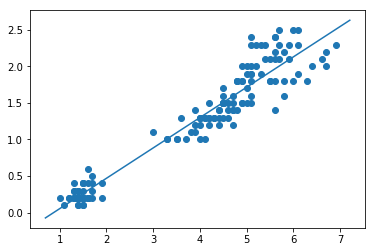

In [57]:
import matplotlib.pyplot as plt

plt.scatter(iris['Petal.Length'], iris['Petal.Width'])
abline(fit.params['Petal.Length'], fit.params['const'])

You can see that the *abline()* function adds the best fit line to the scatterplot. 

## Prediction
Now, that we have a linear model with the relationship between petal length and petal width, we can use the equation to predict petal width given set values of petal length.

For example, if we have a petal length value of 1 cm, using the prediction equation, what will the petal width be?
Recall that m is the name of the linear model that you created above.

In [78]:
new_data = pd.DataFrame({"const": [1],
                         "Petal.Length": [1]})
print(fit.predict(new_data))

0    0.05268
dtype: float64


So if we have a petal length of 1 cm, we predict that the petal widtch will be 0.05 cm. 

If we are interested in a group of values for petal length, we can use the same function to estimate petal with for multiple values.

In [81]:
new_data = pd.DataFrame({"const": [1]*5,
                         "Petal.Length": [1,2,3,4,5]})
print(fit.predict(new_data))

0    0.052680
1    0.468435
2    0.884191
3    1.299946
4    1.715702
dtype: float64


The results now show us petal width for iris' with a petal length of 1, 2, 3, 4, or 5 cm. 

## Standard Error of Prediction
Once, we know the correlation between two variables (as we learned in the last module), it is easy to use the following formula to calculate the standard error of prediction.

$$s_{YX} = s_Y*sqrt(1-r^2_{XY})$$
$s_{YX}$ is the standard error of prediction
$s_Y$ is the standard deviation of variable Y (independent variable)
$r^2_{XY}$ is the correlation between the variables X and Y